# Chapter 2 Applied Problems
## Problem 9

This exercise involves the `Auto` data set studied in the lab. Make sure
that the missing values have been removed from the data.
### (a)
**Which of the predictors are quantitative, and which are qualitative?**

In [1]:
import os #select data directory
import pandas as pd #read and work with dataset

In [2]:
#selectig data directory
os.chdir(r"C:\Users\betyv\Documents\0 Self Learning\Statistical Learning wt Applications in Python\Datasets")
#reading csv file
auto = pd.read_csv('Auto.data',
                  na_values=['?'],
                  delim_whitespace = True)
#showing the dataframe
display(auto)



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


We see that the data frame has 397 rows and 9 columns. 

Now, dropping the missing values if any.

In [3]:
auto = auto.dropna()
auto.shape

(392, 9)

Now, checking which variables are quantitative and qualitative we will use `dtypes` attribute.

In [4]:
data_types = auto.dtypes
data_types

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

By examining the predictors: 
 - `cylinders` can be treated as a qualitative variable since it can only take the values 3,4,5,6,9. 
 - `origin` can be treated as a qualitative variable since it takes the values: 1 - American, 2 - European, 3 - Japanese.     
 
Thus, we have that: 
- **Quantitative Predictors:** weight, year, mpg, displacement, accelaration, horsepower.
- **Qualitative Predictors:** name, origin, cylinders. 

For ease of future data analysis, we will change the data type of `cylinders`  and `origin`. 

In [5]:
#cylinders 
auto.cylinders = pd.Series(auto.cylinders, dtype='category')

#origin 
origin_dictionary = {
    1: 'American',
    2: 'European',
    3: 'Japanese'
}

auto['origin'] = pd.Categorical(auto['origin']).rename_categories(origin_dictionary)

#check data types 
display(auto.cylinders.dtype)
display(auto.origin.dtype)

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False)

CategoricalDtype(categories=['American', 'European', 'Japanese'], ordered=False)

### (b) 
**What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in `numpy`.**

We will start by creating a list specifying our quantitative predecitors from the answer above. Then, we will create a function that obtains the range for each quantitative predictor.  

In [6]:
import numpy as np

#List of quantitative predictors
quantitative_predictors = ['weight',
                           'year',
                           'horsepower',
                           'mpg',
                           'displacement',
                           'acceleration']

#Function that calculates the range for each quantitative predictors
ranges = {}
for column in quantitative_predictors:
    min_value = np.min(auto[column])
    max_value = np.max(auto[column])
    ranges[column] = {'min': min_value, 'max': max_value}
for column, values in ranges.items():
    print(f"Range for {column}: Min = {values['min']}, Max = {values['max']}")

Range for weight: Min = 1613.0, Max = 5140.0
Range for year: Min = 70, Max = 82
Range for horsepower: Min = 46.0, Max = 230.0
Range for mpg: Min = 9.0, Max = 46.6
Range for displacement: Min = 68.0, Max = 455.0
Range for acceleration: Min = 8.0, Max = 24.8


### (c)
**What is the mean and standard deviation of each quantitative predictor?**

The `describe()` method provides a summary of descriptive statistics. We can use it to obtain the mean and standard deviation, along with count, minimum value, maximum value, and quartiles.  

Using `quantitave_predictors` and from the previous answer, and `describe()` we obtain the mean and standard deviation for each quantitative predictor as: 

In [7]:
auto[quantitative_predictors].describe()

,weight,year,horsepower,mpg,displacement,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,2977.584184,75.979592,104.469388,23.445918,194.411990,15.541327
std,849.402560,3.683737,38.491160,7.805007,104.644004,2.758864
min,1613.000000,70.000000,46.000000,9.000000,68.000000,8.000000
25%,2225.250000,73.000000,75.000000,17.000000,105.000000,13.775000
50%,2803.500000,76.000000,93.500000,22.750000,151.000000,15.500000
75%,3614.750000,79.000000,126.000000,29.000000,275.750000,17.025000
max,5140.000000,82.000000,230.000000,46.600000,455.000000,24.800000


### (d)
**Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

To answer this question, we will drop by index using the `drop()` method, and then `describe()` to get the new summary statistics.

To specify the range of the index, we will use slice notation `:`. Recall that when slicing, the lower limit of the range is inclusive and the upper limit is exclusive. Additionally, for this data frame, the indexing of the rows starts from 0. Meaning that the 10th observation is index number: 9, and the 85th observation is index number: 84. 

Using this knowledge, to accurately remove observations 10th through 85th, the range that should be specified is 9 through 85.

Lastly, specifying `inplace = True` allows us to do the drop operation in the same dataframe. 

In [8]:
#dropping 10-85th observation
auto.drop(auto.index[9:85], inplace = True)
#new summary stats 
auto[quantitative_predictors].describe()

,weight,year,horsepower,mpg,displacement,acceleration
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,2935.971519,77.145570,100.721519,24.404430,187.240506,15.726899
std,811.300208,3.106217,35.708853,7.867283,99.678367,2.693721
min,1649.000000,70.000000,46.000000,11.000000,68.000000,8.500000
25%,2213.750000,75.000000,75.000000,18.000000,100.250000,14.000000
50%,2792.500000,77.000000,90.000000,23.950000,145.500000,15.500000
75%,3508.000000,80.000000,115.000000,30.550000,250.000000,17.300000
max,4997.000000,82.000000,230.000000,46.600000,455.000000,24.800000


### (e) 
**Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.**

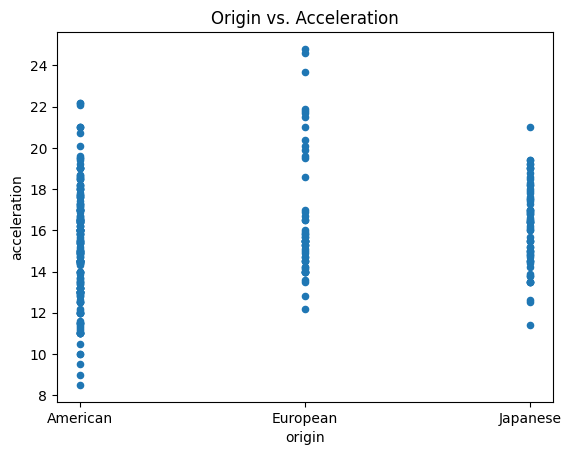

In [9]:
import matplotlib.pyplot as plt

origin_vs_acceleration_scatter = auto.plot.scatter('origin', 'acceleration')
origin_vs_acceleration_scatter.set_title('Origin vs. Acceleration');

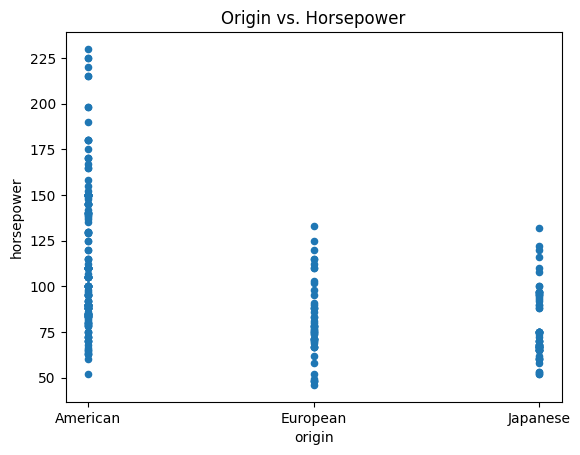

In [10]:
origin_vs_horsepower_scatter = auto.plot.scatter('origin', 'horsepower')
origin_vs_horsepower_scatter.set_title('Origin vs. Horsepower');

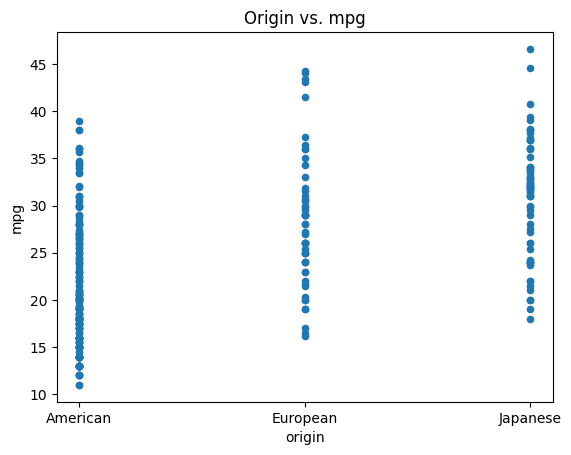

In [11]:
origin_vs_mpg_scatter = auto.plot.scatter('origin', 'mpg')
origin_vs_mpg_scatter.set_title('Origin vs. mpg');

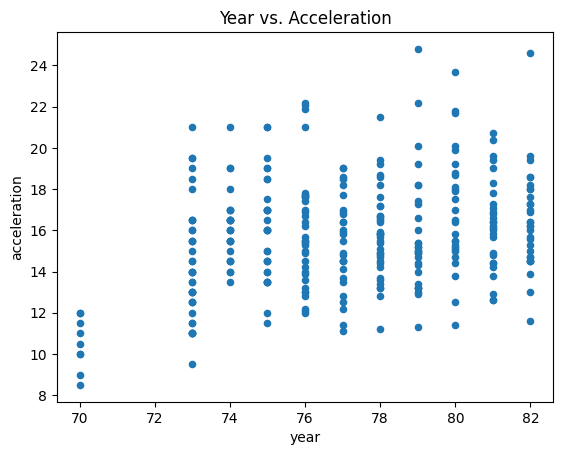

In [12]:
year_vs_acceleration_scatter = auto.plot.scatter('year', 'acceleration')
year_vs_acceleration_scatter.set_title('Year vs. Acceleration');

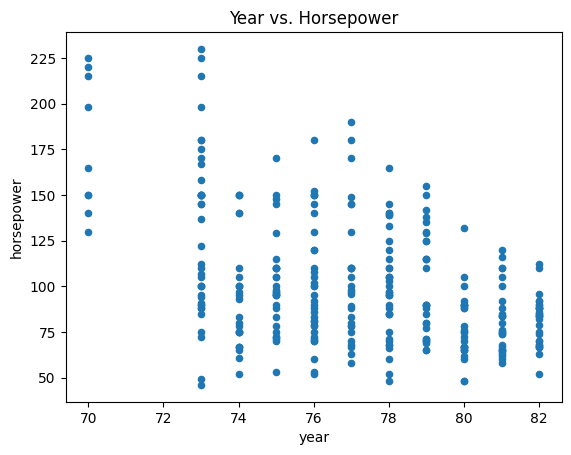

In [13]:
year_vs_horsepower_scatter = auto.plot.scatter('year', 'horsepower')
year_vs_horsepower_scatter.set_title('Year vs. Horsepower');

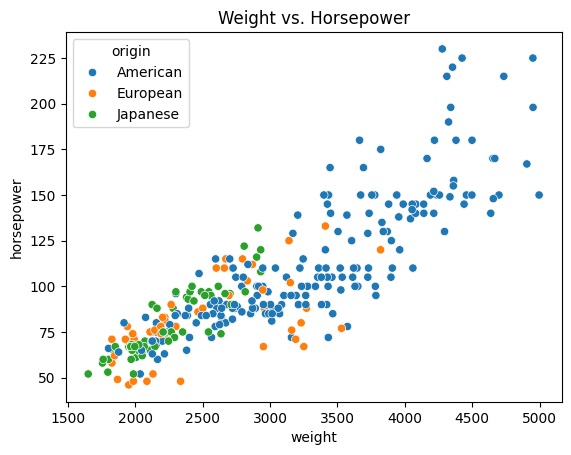

In [21]:
import seaborn as sns
weight_vs_horsepower_scatter = sns.scatterplot(x = 'weight',
                                              y= 'horsepower',
                                              hue = 'origin',
                                              data = auto)
weight_vs_horsepower_scatter.set_title('Weight vs. Horsepower');

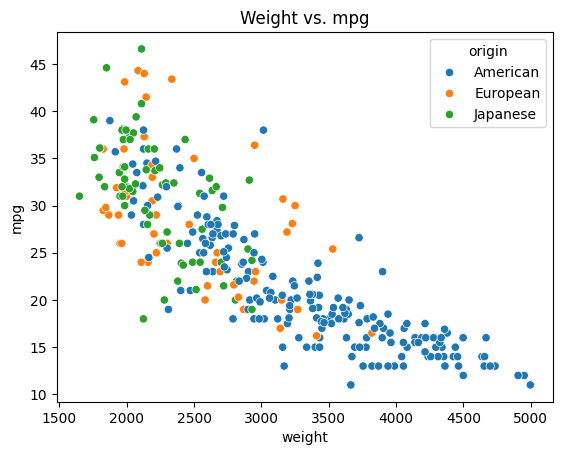

In [15]:
weight_vs_mpg_scatter = sns.scatterplot(x = 'weight',
                                              y= 'mpg',
                                              hue = 'origin',
                                              data = auto)
weight_vs_mpg_scatter.set_title('Weight vs. mpg');

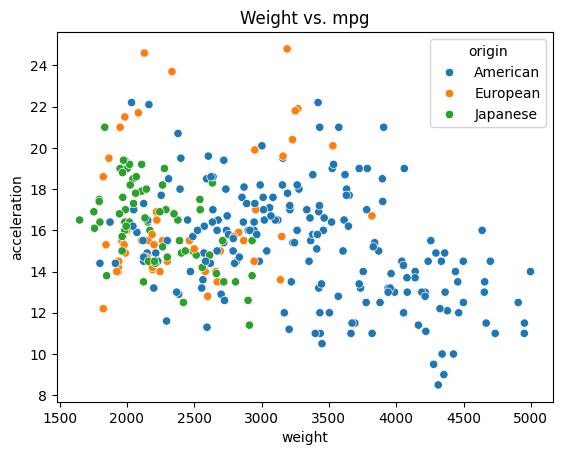

In [20]:
weight_vs_mpg_acceleration = sns.scatterplot(x = 'weight',
                                              y= 'acceleration',
                                              hue = 'origin',
                                              data = auto)
weight_vs_mpg_acceleration.set_title('Weight vs. mpg');

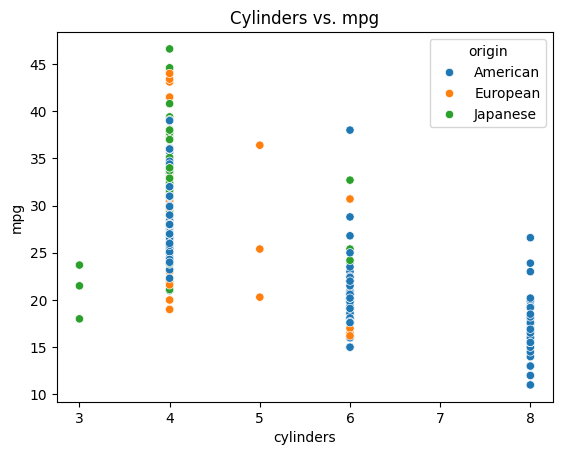

In [22]:
cyl_vs_mpg = sns.scatterplot(x = 'cylinders',
                             y= 'mpg',
                             hue = 'origin',
                             data = auto)
cyl_vs_mpg.set_title('Cylinders vs. mpg');

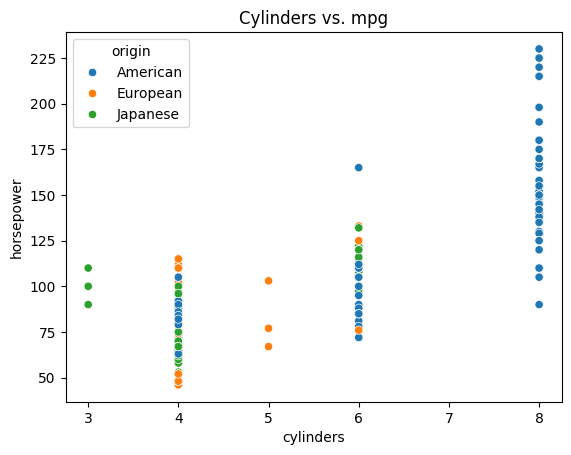

In [23]:
cyl_vs_horsepower = sns.scatterplot(x = 'cylinders',
                             y= 'horsepower',
                             hue = 'origin',
                             data = auto)
cyl_vs_horsepower.set_title('Cylinders vs. mpg');

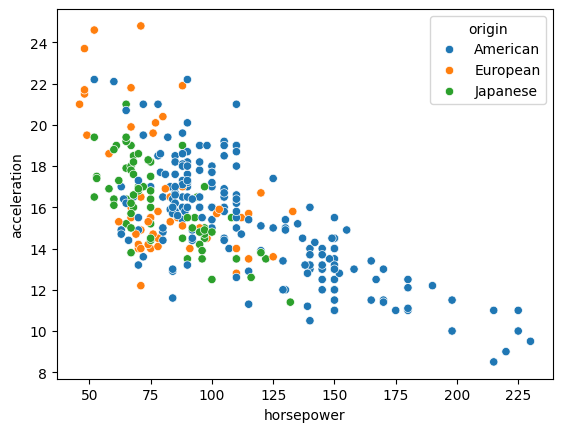

In [18]:
horsepower_vs_acceleration = sns.scatterplot(x = 'horsepower',
                             y= 'acceleration',
                             hue = 'origin',
                             data = auto)
cyl_vs_horsepower.set_title('Horsepower vs. Acceleration');

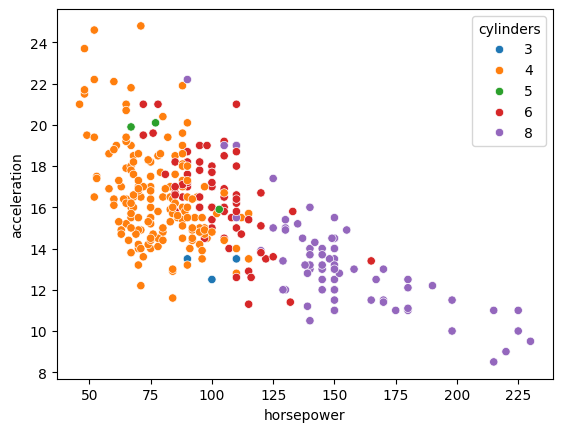

In [19]:
horsepower_vs_acceleration = sns.scatterplot(x = 'horsepower',
                             y= 'acceleration',
                             hue = 'cylinders',
                             data = auto)
cyl_vs_horsepower.set_title('Horsepower vs. Acceleration');

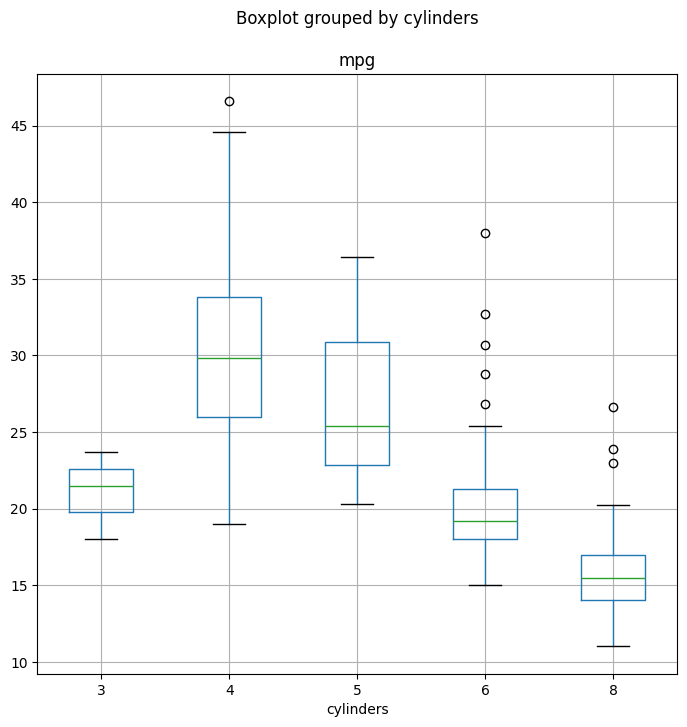

In [25]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8, 8))
auto.boxplot('mpg', by='cylinders', ax=ax);

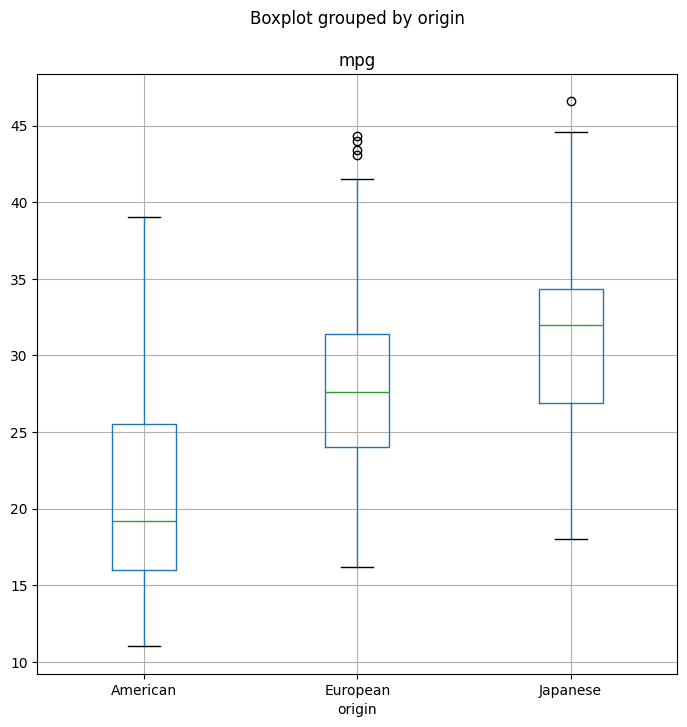

In [29]:
fig, ax = subplots(figsize=(8, 8))
auto.boxplot('mpg', by='origin', ax=ax);

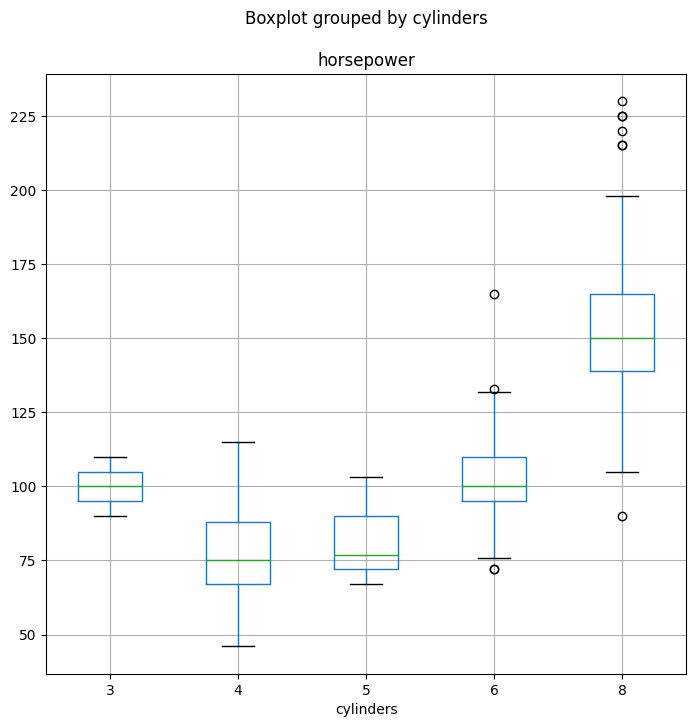

In [28]:
fig, ax = subplots(figsize=(8,8))
auto.boxplot('horsepower', by='cylinders', ax=ax);